## Baseline Model

Building a baseline model as a starting point for feature engineering


In [2]:
import pandas as pd

click_data = pd.read_csv('data/train_sample.csv', parse_dates=['click_time'])
click_data.head(10)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,89489,3,1,13,379,2017-11-06 15:13:23,NaN,0
1,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1
2,3437,6,1,13,459,2017-11-06 15:42:32,NaN,0
3,167543,3,1,13,379,2017-11-06 15:56:17,NaN,0
4,147509,3,1,13,379,2017-11-06 15:57:01,NaN,0
5,71421,15,1,13,153,2017-11-06 16:00:00,NaN,0
6,76953,14,1,13,379,2017-11-06 16:00:01,NaN,0
7,187909,2,1,25,477,2017-11-06 16:00:01,NaN,0
8,116779,1,1,8,150,2017-11-06 16:00:01,NaN,0
9,47857,3,1,15,205,2017-11-06 16:00:01,NaN,0


### Missing Values

1. option: drop columns with missing values
2. option: imputation fills in the missing values with some number. e.g. median
3. option: extended imputation: add column to mark which values were originally missing

In [4]:
# Get names of columns with missing values
cols_with_missing = [col for col in click_data.columns if click_data[col].isnull().any()]

# Drop columns in training and validation data
reduced_click_data = click_data.drop(cols_with_missing, axis=1)
reduced_click_data.head()

,ip,app,device,os,channel,click_time,is_attributed
0,89489,3,1,13,379,2017-11-06 15:13:23,0
1,204158,35,1,13,21,2017-11-06 15:41:07,1
2,3437,6,1,13,459,2017-11-06 15:42:32,0
3,167543,3,1,13,379,2017-11-06 15:56:17,0
4,147509,3,1,13,379,2017-11-06 15:57:01,0


In [21]:
from sklearn.impute import SimpleImputer

# Imputation
imputer = SimpleImputer()
cols = [c for c in click_data.columns if c not in ['click_time', 'attributed_time']]
imputed_click_data = pd.DataFrame(
    imputer.fit_transform(click_data[cols]),
    columns=cols
)
imputed_click_data.head()


,ip,app,device,os,channel,is_attributed
0,89489.0,3.0,1.0,13.0,379.0,0.0
1,204158.0,35.0,1.0,13.0,21.0,1.0
2,3437.0,6.0,1.0,13.0,459.0,0.0
3,167543.0,3.0,1.0,13.0,379.0,0.0
4,147509.0,3.0,1.0,13.0,379.0,0.0


In [22]:
# Extended Imputation
imputer = SimpleImputer()
cols = [c for c in click_data.columns if c not in ['click_time', 'attributed_time']]
cols_with_missing = [c for c in cols if click_data[c].isnull().any()]
imputed_click_data = pd.DataFrame(
    imputer.fit_transform(click_data[cols]),
    columns=cols
)
for c in cols_with_missing:
    imputed_click_data['{}_missing'.format(c)] = click_data[c].isnull()

imputed_click_data.head()


,ip,app,device,os,channel,is_attributed
0,89489.0,3.0,1.0,13.0,379.0,0.0
1,204158.0,35.0,1.0,13.0,21.0,1.0
2,3437.0,6.0,1.0,13.0,459.0,0.0
3,167543.0,3.0,1.0,13.0,379.0,0.0
4,147509.0,3.0,1.0,13.0,379.0,0.0


### Features from timestamps

From the timestamps, create features for the day, hour, minute and second. Store these as new integer columns `day`, `hour`, `minute`, and `second` in a new DataFrame `clicks`.

In [2]:
# Add new columns for timestamp features day, hour, minute, and second
clicks = click_data.copy()
clicks['day'] = clicks['click_time'].dt.day.astype('uint8')
# Fill in the rest
# Hint: With a timestamp column in a dataframe, you can get access to datetime attibutes and functions with the .dt attribute.
# For example tscolumn.dt.day will convert a timestamp column to days
clicks['hour'] = clicks['click_time'].dt.hour.astype('uint8')
clicks['minute'] = clicks['click_time'].dt.minute.astype('uint8')
clicks['second'] = clicks['click_time'].dt.second.astype('uint8')

### Label Encoding
For each of the categorical features `['ip', 'app', 'device', 'os', 'channel']`, use scikit-learn's `LabelEncoder` to create new features in the `clicks` DataFrame. The new column names should be the original column name with `'_labels'` appended, like `ip_labels`.

In [3]:
from sklearn import preprocessing

cat_features = ['ip', 'app', 'device', 'os', 'channel']

# Create new columns in clicks using preprocessing.LabelEncoder()
# Hint: Try looping through each of the categorical features and using the using LabelEncoder's .fit_transform method
label_encoder = preprocessing.LabelEncoder()
for feature in cat_features:
    encoded = label_encoder.fit_transform(clicks[feature])
    clicks[feature + '_labels'] = encoded

clicks.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second,ip_labels,app_labels,device_labels,os_labels,channel_labels
0,89489,3,1,13,379,2017-11-06 15:13:23,NaN,0,6,15,13,23,27226,3,1,13,120
1,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1,6,15,41,7,110007,35,1,13,10
2,3437,6,1,13,459,2017-11-06 15:42:32,NaN,0,6,15,42,32,1047,6,1,13,157
3,167543,3,1,13,379,2017-11-06 15:56:17,NaN,0,6,15,56,17,76270,3,1,13,120
4,147509,3,1,13,379,2017-11-06 15:57:01,NaN,0,6,15,57,1,57862,3,1,13,120


### One-hot Encoding

Now you have label encoded features, does it make sense to use one-hot encoding for the categorical variables ip, app, device, os, or channel?

Solution: The ip column has 58,000 values, which means it will create an extremely sparse matrix with 58,000 columns. This many columns will make your model run very slow, so in general you want to avoid one-hot encoding features with many levels. LightGBM models work with label encoded features, so you don't actually need to one-hot encode the categorical features.

### Train/test splits with time series data
With our baseline features ready, we need to split our data into training and validation sets. We should also hold out a test set to measure the final accuracy of the model.

This is time series data. Are they any special considerations when creating train/test splits for time series? If so, what and why?

Since our model is meant to predict events in the future, we must also validate the model on events in the future. If the data is mixed up between the training and test sets, then future data will leak in to the model and our validation results will overestimate the performance on new data.

In [4]:
feature_cols = ['day', 'hour', 'minute', 'second', 
                'ip_labels', 'app_labels', 'device_labels',
                'os_labels', 'channel_labels']

valid_fraction = 0.1
clicks_srt = clicks.sort_values('click_time')
valid_rows = int(len(clicks_srt) * valid_fraction)
train = clicks_srt[:-valid_rows * 2]
# valid size == test size, last two sections of the data
valid = clicks_srt[-valid_rows * 2:-valid_rows]
test = clicks_srt[-valid_rows:]

### Train with LightGBM

Now we can create LightGBM dataset objects for each of the smaller datasets and train the baseline model.

In [5]:
import lightgbm as lgb

dtrain = lgb.Dataset(train[feature_cols], label=train['is_attributed'])
dvalid = lgb.Dataset(valid[feature_cols], label=valid['is_attributed'])
dtest = lgb.Dataset(test[feature_cols], label=test['is_attributed'])

param = {'num_leaves': 64, 'objective': 'binary'}
param['metric'] = 'auc'
num_round = 1000
bst = lgb.train(param, dtrain, num_round, valid_sets=[dvalid], early_stopping_rounds=10)

[1]	valid_0's auc: 0.948979
Training until validation scores don't improve for 10 rounds
[2]	valid_0's auc: 0.949235
[3]	valid_0's auc: 0.950126
[4]	valid_0's auc: 0.950072
[5]	valid_0's auc: 0.950536
[6]	valid_0's auc: 0.950943
[7]	valid_0's auc: 0.951453
[8]	valid_0's auc: 0.951518
[9]	valid_0's auc: 0.952385
[10]	valid_0's auc: 0.952434
[11]	valid_0's auc: 0.952465
[12]	valid_0's auc: 0.952638
[13]	valid_0's auc: 0.95266
[14]	valid_0's auc: 0.952766
[15]	valid_0's auc: 0.953203
[16]	valid_0's auc: 0.953503
[17]	valid_0's auc: 0.953793
[18]	valid_0's auc: 0.953966
[19]	valid_0's auc: 0.954184
[20]	valid_0's auc: 0.9543
[21]	valid_0's auc: 0.954305
[22]	valid_0's auc: 0.954536
[23]	valid_0's auc: 0.954748
[24]	valid_0's auc: 0.955142
[25]	valid_0's auc: 0.955493
[26]	valid_0's auc: 0.955611
[27]	valid_0's auc: 0.955708
[28]	valid_0's auc: 0.955795
[29]	valid_0's auc: 0.956172
[30]	valid_0's auc: 0.95623
[31]	valid_0's auc: 0.956477
[32]	valid_0's auc: 0.956606
[33]	valid_0's auc: 0.95

### Evaluate the model
Finally, with the model trained, I'll evaluate it's performance on the test set. 

In [6]:
from sklearn import metrics

ypred = bst.predict(test[feature_cols])
score = metrics.roc_auc_score(test['is_attributed'], ypred)
print(f"Test score: {score}")

Test score: 0.9726727334566094


## Categorical Encodings

There are many ways to encode categorical data for modeling.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, metrics
import lightgbm as lgb

clicks = pd.read_parquet('data/baseline_data.pqt')

In [ ]:
def get_data_splits(dataframe, valid_fraction=0.1):
    """ Splits a dataframe into train, validation, and test sets. First, orders by 
        the column 'click_time'. Set the size of the validation and test sets with
        the valid_fraction keyword argument.
    """

    dataframe = dataframe.sort_values('click_time')
    valid_rows = int(len(dataframe) * valid_fraction)
    train = dataframe[:-valid_rows * 2]
    # valid size == test size, last two sections of the data
    valid = dataframe[-valid_rows * 2:-valid_rows]
    test = dataframe[-valid_rows:]
    
    return train, valid, test

def train_model(train, valid, test=None, feature_cols=None):
    if feature_cols is None:
        feature_cols = train.columns.drop(['click_time', 'attributed_time',
                                           'is_attributed'])
    dtrain = lgb.Dataset(train[feature_cols], label=train['is_attributed'])
    dvalid = lgb.Dataset(valid[feature_cols], label=valid['is_attributed'])
    
    param = {'num_leaves': 64, 'objective': 'binary', 
             'metric': 'auc', 'seed': 7}
    num_round = 1000
    print("Training model!")
    bst = lgb.train(param, dtrain, num_round, valid_sets=[dvalid], 
                    early_stopping_rounds=20, verbose_eval=False)
    
    valid_pred = bst.predict(valid[feature_cols])
    valid_score = metrics.roc_auc_score(valid['is_attributed'], valid_pred)
    print(f"Validation AUC score: {valid_score}")
    
    if test is not None: 
        test_pred = bst.predict(test[feature_cols])
        test_score = metrics.roc_auc_score(test['is_attributed'], test_pred)
        return bst, valid_score, test_score
    else:
        return bst, valid_score

In [ ]:
print("Baseline model")
train, valid, test = get_data_splits(clicks)
_ = train_model(train, valid)

### Categorical encodings and leakage

These encodings are all based on statistics calculated from the dataset like counts and means. Considering this, what data should you be using to calculate the encodings?

Solution: You should calculate the encodings from the training set only. If you include data from the validation and test sets into the encodings, you'll overestimate the model's performance. You should in general be vigilant to avoid leakage, that is, including any information from the validation and test sets into the model. https://www.kaggle.com/alexisbcook/data-leakage

### Count encodings

Count encoding replaces each categorical value with the number of times it appears in the dataset. For example, if the value "GB" occured 10 times in the country feature, then each "GB" would be replaced with the number 10.

Here, encode the categorical features `['ip', 'app', 'device', 'os', 'channel']` using the count of each value in the data set. Using `CountEncoder` from the `category_encoders` library, fit the encoding using the categorical feature columns defined in `cat_features`. Then apply the encodings to the train and validation sets, adding them as new columns with names suffixed `"_count"`.

Hint: CountEncoder works like scikit-learn classes with a .fit method to calculate counts and a .transform method to apply the encoding. You can join two dataframes with the same index using .join and add suffixes to columns names with .add_suffix



In [ ]:
import category_encoders as ce

cat_features = ['ip', 'app', 'device', 'os', 'channel']
train, valid, test = get_data_splits(clicks)

# Create the count encoder
count_enc = ce.CountEncoder(cols=cat_features)

# Learn encoding from the training set
count_enc.fit(train[cat_features])

# Apply encoding to the train and validation sets
train_encoded = train.join(count_enc.transform(train[cat_features]).add_suffix('_count'))
valid_encoded = valid.join(count_enc.transform(valid[cat_features]).add_suffix('_count'))

In [ ]:
# Train the model on the encoded datasets
# This can take around 30 seconds to complete
# Count encoding improved our model's score!
_ = train_model(train_encoded, valid_encoded)

### Why is count encoding effective?
At first glance, it could be surprising that Count Encoding helps make accurate models. 
Why do you think is count encoding is a good idea, or how does it improve the model score?

Solution: Rare values tend to have similar counts (with values like 1 or 2), so you can classify rare values together at prediction time. Common values with large counts are unlikely to have the same exact count as other values. So, the common/important values get their own grouping.

### Target encoding

Here you'll try some supervised encodings that use the labels (the targets) to transform categorical features. The first one is target encoding. Create the target encoder from the `category_encoders` library. Then, learn the encodings from the training dataset, apply the encodings to all the datasets and retrain the model.

Target encoding replaces a categorical value with the average value of the target for that value of the feature. For example, given the country value "CA", you'd calculate the average outcome for all the rows with country == 'CA', around 0.28. This is often blended with the target probability over the entire dataset to reduce the variance of values with few occurences.

This technique uses the targets to create new features. So including the validation or test data in the target encodings would be a form of target leakage. Instead, you should learn the target encodings from the training dataset only and apply it to the other datasets.

The category_encoders package provides TargetEncoder for target encoding. The implementation is similar to CountEncoder.

Hint: TargetEncoder works like scikit-learn classes with a .fit method to learn the encoding and a .transform method to apply the encoding. Also note that you'll need to tell it which columns are categorical variables.

In [ ]:
cat_features = ['ip', 'app', 'device', 'os', 'channel']
train, valid, test = get_data_splits(clicks)

# Create the target encoder. You can find this easily by using tab completion.
# Start typing ce. the press Tab to bring up a list of classes and functions.
# Have to tell it which features are categorical when they aren't strings
target_enc = ce.TargetEncoder(cols=cat_features)

# Learn encoding from the training set
target_enc.fit(train[cat_features], train['is_attributed'])

# Apply encoding to the train and validation sets
train_encoded = train.join(target_enc.transform(train[cat_features]).add_suffix('_target'))
valid_encoded = valid.join(target_enc.transform(valid[cat_features]).add_suffix('_target'))

In [ ]:
_ = train_model(train_encoded, valid_encoded)

### Try removing IP encoding

Try leaving `ip` out of the encoded features and retrain the model with target encoding again. You should find that the score increases and is above the baseline score! Why do you think the score is below baseline when we encode the IP address but above baseline when we don't?

Solution: Target encoding attempts to measure the population mean of the target for each level in a categorical feature. This means when there is less data per level, the estimated mean will be further away from the "true" mean, there will be more variance. There is little data per IP address so it's likely that the estimates are much noisier than for the other features. The model will rely heavily on this feature since it is extremely predictive. This causes it to make fewer splits on other features, and those features are fit on just the errors left over accounting for IP address. So, the model will perform very poorly when seeing new IP addresses that weren't in the training data (which is likely most new data). Going forward, we'll leave out the IP feature when trying different encodings.

In [ ]:
cat_features = ['app', 'device', 'os', 'channel']
train, valid, test = get_data_splits(clicks)

# Create the target encoder. You can find this easily by using tab completion.
# Start typing ce. the press Tab to bring up a list of classes and functions.
# Have to tell it which features are categorical when they aren't strings
target_enc = ce.TargetEncoder(cols=cat_features)

# Learn encoding from the training set
target_enc.fit(train[cat_features], train['is_attributed'])

# Apply encoding to the train and validation sets
train_encoded = train.join(target_enc.transform(train[cat_features]).add_suffix('_target'))
valid_encoded = valid.join(target_enc.transform(valid[cat_features]).add_suffix('_target'))

_ = train_model(train_encoded, valid_encoded)

### CatBoost Encoding

The CatBoost encoder is supposed to working well with the LightGBM model. Encode the categorical features with `CatBoostEncoder` and train the model on the encoded data again.

Finally, we'll look at CatBoost encoding. This is similar to target encoding in that it's based on the target probablity for a given value. However with CatBoost, for each row, the target probability is calculated only from the rows before it.

Hint: CatBoostEncoder works like scikit-learn classes with a .fit method to learn the encoding and a .transform method to apply the encoding. Also note that you'll need to tell it which columns are categorical variables.

In [ ]:
# remove IP from the encoded features
cat_features = ['app', 'device', 'os', 'channel']

train, valid, test = get_data_splits(clicks)

# Create the CatBoost encoder
# Have to tell it which features are categorical when they aren't strings
cb_enc = ce.CatBoostEncoder(cols=cat_features, random_state=7)

# Learn encoding from the training set
cb_enc.fit(train[cat_features], train['is_attributed'])

# Apply encoding to the train and validation sets
train_encoded = train.join(cb_enc.transform(train[cat_features]).add_suffix('_cb'))
valid_encoded = valid.join(cb_enc.transform(valid[cat_features]).add_suffix('_cb'))

In [ ]:
# The CatBoost encodings work the best, so we'll keep those.
_ = train_model(train_encoded, valid_encoded)

In [ ]:
encoded = cb_enc.transform(clicks[cat_features])
for col in encoded:
    clicks.insert(len(clicks.columns), col + '_cb', encoded[col])

In [ ]:
clicks.head()

## Feature Generation

The frequently usedful case where you can combine data from multiple rows into useful features



In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.preprocessing import LabelEncoder

ks = pd.read_csv('data/ks-projects-201801.csv',
                 parse_dates=['deadline', 'launched'])

# Drop live projects
ks = ks.query('state != "live"')

# Add outcome column, "successful" == 1, others are 0
ks = ks.assign(outcome=(ks['state'] == 'successful').astype(int))

# Timestamp features
ks = ks.assign(hour=ks.launched.dt.hour,
               day=ks.launched.dt.day,
               month=ks.launched.dt.month,
               year=ks.launched.dt.year)

# Label encoding
cat_features = ['category', 'currency', 'country']
encoder = LabelEncoder()
encoded = ks[cat_features].apply(encoder.fit_transform)

data_cols = ['goal', 'hour', 'day', 'month', 'year', 'outcome']
baseline_data = ks[data_cols].join(encoded)

### Interactions
One of the easiest ways to create new features is by combining categorical variables. For example, if one record has the country "CA" and category "Music", you can create a new value "CA_Music". This is a new categorical feature that can provide information about correlations between categorical variables. This type of feature is typically called an interaction. In general, you would build interaction features from all pairs of categorical features. You can make interactions from three or more features as well, but you'll tend to get diminishing returns.

Pandas lets us simply add string columns together like normal Python strings.

In [5]:
interactions = ks['category'] + "_" + ks['country']
print(interactions.head(10))

0            Poetry_GB
1    Narrative Film_US
2    Narrative Film_US
3             Music_US
4      Film & Video_US
5       Restaurants_US
6              Food_US
7            Drinks_US
8    Product Design_US
9       Documentary_US
dtype: object


Then, label encode the interaction feature and add it to our data.

In [6]:
label_enc = LabelEncoder()
data_interaction = baseline_data.assign(category_country=label_enc.fit_transform(interactions))
data_interaction.head()

,goal,hour,day,month,year,outcome,category,currency,country,category_country
0,1000.0,12,11,8,2015,0,108,5,9,1900
1,30000.0,4,2,9,2017,0,93,13,22,1630
2,45000.0,0,12,1,2013,0,93,13,22,1630
3,5000.0,3,17,3,2012,0,90,13,22,1595
4,19500.0,8,4,7,2015,0,55,13,22,979


### Number of projects in the last week

First up I'll show you how to count the number of projects launched in the preceeding week for each record. I'll use the .rolling method on a series with the "launched" column as the index. I'll create the series, using ks.launched as the index and ks.index as the values, then sort the times. Using a time series as the index allows us to define the rolling window size in terms of hours, days, weeks, etc.

In [7]:
# First, create a Series with a timestamp index
launched = pd.Series(ks.index, index=ks.launched, name="count_7_days").sort_index()
launched.head(20)

launched
1970-01-01 01:00:00     94579
1970-01-01 01:00:00    319002
1970-01-01 01:00:00    247913
1970-01-01 01:00:00     48147
1970-01-01 01:00:00     75397
1970-01-01 01:00:00      2842
1970-01-01 01:00:00    273779
2009-04-21 21:02:48    169268
2009-04-23 00:07:53    322000
2009-04-24 21:52:03    138572
2009-04-25 17:36:21    325391
2009-04-27 14:10:39    122662
2009-04-28 13:55:41    213711
2009-04-29 02:04:21    345606
2009-04-29 02:58:50    235255
2009-04-29 04:37:37     98954
2009-04-29 05:26:32    342226
2009-04-29 06:43:44    275091
2009-04-29 13:52:03    284115
2009-04-29 22:08:13     32898
Name: count_7_days, dtype: int64

There are seven projects that have obviously wrong launch dates, but we'll just ignore them. Again, this is something you'd handle when cleaning the data, but it's not the focus of this mini-course.

With a timeseries index, you can use .rolling to select time periods as the window. For example launched.rolling('7d') creates a rolling window that contains all the data in the previous 7 days. The window contains the current record, so if we want to count all the previous projects but not the current one, we'll need to subtract 1. We'll plot the results to make sure it looks right.

launched
1970-01-01 01:00:00     0.0
1970-01-01 01:00:00     1.0
1970-01-01 01:00:00     2.0
1970-01-01 01:00:00     3.0
1970-01-01 01:00:00     4.0
1970-01-01 01:00:00     5.0
1970-01-01 01:00:00     6.0
2009-04-21 21:02:48     0.0
2009-04-23 00:07:53     1.0
2009-04-24 21:52:03     2.0
2009-04-25 17:36:21     3.0
2009-04-27 14:10:39     4.0
2009-04-28 13:55:41     5.0
2009-04-29 02:04:21     5.0
2009-04-29 02:58:50     6.0
2009-04-29 04:37:37     7.0
2009-04-29 05:26:32     8.0
2009-04-29 06:43:44     9.0
2009-04-29 13:52:03    10.0
2009-04-29 22:08:13    11.0
Name: count_7_days, dtype: float64


Text(0.5, 1.0, 'Competitions in the last 7 days')

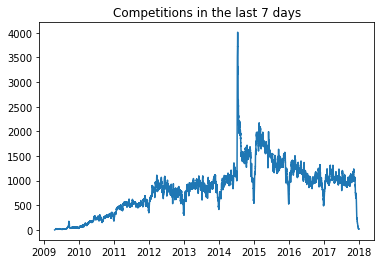

In [8]:
count_7_days = launched.rolling('7d').count() - 1
print(count_7_days.head(20))

# Ignore records with broken launch dates
plt.plot(count_7_days[7:]);
plt.title("Competitions in the last 7 days")

Now that we have the counts, we need to adjust the index so we can join it with the other training data.

In [9]:
count_7_days.index = launched.values
count_7_days = count_7_days.reindex(ks.index)
count_7_days.head(10)

0    1409.0
1     957.0
2     739.0
3     907.0
4    1429.0
5    1284.0
6    1119.0
7    1391.0
8    1043.0
9    3199.0
Name: count_7_days, dtype: float64

Now join the new feature with the other data again using .join since we've matched the index.

In [12]:
baseline_data.join(count_7_days).head(10)

,goal,hour,day,month,year,outcome,category,currency,country,count_7_days
0,1000.0,12,11,8,2015,0,108,5,9,1409.0
1,30000.0,4,2,9,2017,0,93,13,22,957.0
2,45000.0,0,12,1,2013,0,93,13,22,739.0
3,5000.0,3,17,3,2012,0,90,13,22,907.0
4,19500.0,8,4,7,2015,0,55,13,22,1429.0
5,50000.0,13,26,2,2016,1,123,13,22,1284.0
6,1000.0,18,1,12,2014,1,58,13,22,1119.0
7,25000.0,20,1,2,2016,0,41,13,22,1391.0
8,125000.0,18,24,4,2014,0,113,13,22,1043.0
9,65000.0,21,11,7,2014,0,39,13,22,3199.0


### Time since the last project in the same category

Do projects in the same category compete for donors? If you're trying to fund a video game and another game project was just launched, you might not get as much money. We can capture this by calculating the time since the last launch project in the same category.

A handy method for performing operations within groups is to use .groupby then .transform. The .transform method takes a function then passes a series or dataframe to that function for each group. This returns a dataframe with the same indices as the original dataframe. In our case, we'll perform a groupby on "category" and use transform to calculate the time differences for each category.

In [13]:
def time_since_last_project(series):
    # Return the time in hours
    return series.diff().dt.total_seconds() / 3600.

df = ks[['category', 'launched']].sort_values('launched')
timedeltas = df.groupby('category').transform(time_since_last_project)
timedeltas.head(20)

,launched
94579,NaN
319002,NaN
247913,NaN
48147,NaN
75397,NaN
2842,0.000000
273779,NaN
169268,NaN
322000,NaN
138572,NaN


We get NaNs here for projects that are the first in their category. We'll need to fill those in with something like the mean or median. We'll also need to reset the index so we can join it with the other data.

# Final time since last project
timedeltas = timedeltas.fillna(timedeltas.median()).reindex(baseline_data.index)
timedeltas.head(20)

In [14]:
# Final time since last project
timedeltas = timedeltas.fillna(timedeltas.median()).reindex(baseline_data.index)
timedeltas.head(20)

,launched
0,18.606111
1,5.592778
2,1.313611
3,0.635000
4,16.661389
5,2.629722
6,0.367500
7,12.286111
8,14.243611
9,0.174722


### Transforming numerical features

The distribution of the values in "goal" shows that most projects have goals less than 5000 USD. However, there is a long tail of goals going up to $100,000. Some models work better when the features are normally distributed, so it might help to transform the goal values. Common choices for this are the square root and natural logarithm. These transformations can also help constrain outliers.

Here I'll transform the goal feature using the square root and log functions, then fit a model to see if it helps

Text(0.5, 1.0, 'Goal')

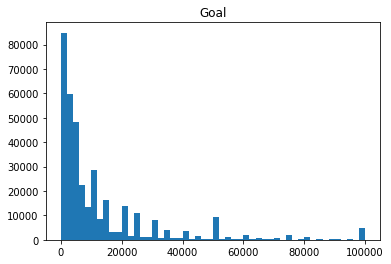

In [15]:
plt.hist(ks.goal, range=(0, 100000), bins=50)
plt.title('Goal')

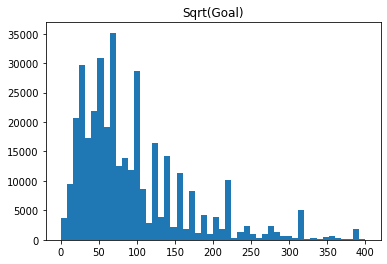

In [16]:
plt.hist(np.sqrt(ks.goal), range=(0, 400), bins=50)
plt.title('Sqrt(Goal)')

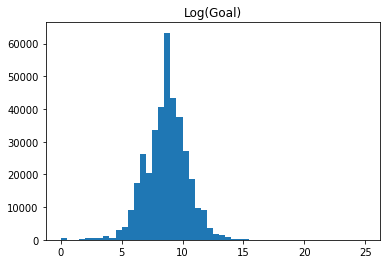

In [17]:
plt.hist(np.log(ks.goal), range=(0, 25), bins=50)
plt.title('Log(Goal)')

The log transformation won't help our model since tree-based models are scale invariant. However, this should help if we had a linear model or neural network.

Other transformations include squares and other powers, exponentials, etc. These might help the model discriminate, like the kernel trick for SVMs. Again, it takes a bit of experimentation to see what works. One method is to create a bunch of new features and later choose the best ones with feature selection algorithms.

In [19]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, metrics
import lightgbm as lgb


# Create features from   timestamps
click_data = pd.read_csv('data/train_sample.csv', parse_dates=['click_time'])
click_times = click_data['click_time']
clicks = click_data.assign(day=click_times.dt.day.astype('uint8'),
                           hour=click_times.dt.hour.astype('uint8'),
                           minute=click_times.dt.minute.astype('uint8'),
                           second=click_times.dt.second.astype('uint8'))

# Label encoding for categorical features
cat_features = ['ip', 'app', 'device', 'os', 'channel']
for feature in cat_features:
    label_encoder = preprocessing.LabelEncoder()
    clicks[feature] = label_encoder.fit_transform(clicks[feature])
    
def get_data_splits(dataframe, valid_fraction=0.1):

    dataframe = dataframe.sort_values('click_time')
    valid_rows = int(len(dataframe) * valid_fraction)
    train = dataframe[:-valid_rows * 2]
    # valid size == test size, last two sections of the data
    valid = dataframe[-valid_rows * 2:-valid_rows]
    test = dataframe[-valid_rows:]
    
    return train, valid, test

def train_model(train, valid, test=None, feature_cols=None):
    if feature_cols is None:
        feature_cols = train.columns.drop(['click_time', 'attributed_time',
                                           'is_attributed'])
    dtrain = lgb.Dataset(train[feature_cols], label=train['is_attributed'])
    dvalid = lgb.Dataset(valid[feature_cols], label=valid['is_attributed'])
    
    param = {'num_leaves': 64, 'objective': 'binary', 
             'metric': 'auc', 'seed': 7}
    num_round = 1000
    print("Training model. Hold on a minute to see the validation score")
    bst = lgb.train(param, dtrain, num_round, valid_sets=[dvalid], 
                    early_stopping_rounds=20, verbose_eval=False)
    
    valid_pred = bst.predict(valid[feature_cols])
    valid_score = metrics.roc_auc_score(valid['is_attributed'], valid_pred)
    print(f"Validation AUC score: {valid_score}")
    
    if test is not None: 
        test_pred = bst.predict(test[feature_cols])
        test_score = metrics.roc_auc_score(test['is_attributed'], test_pred)
        return bst, valid_score, test_score
    else:
        return bst, valid_score

print("Baseline model score")
train, valid, test = get_data_splits(clicks)
_ = train_model(train, valid, test)

Baseline model score
Training model. Hold on a minute to see the validation score
Validation AUC score: 0.9622743228943659


### Add interaction features

Here you'll add interaction features for each pair of categorical features (ip, app, device, os, channel). The easiest way to iterate through the pairs of features is with `itertools.combinations`. For each new column, join the values as strings with an underscore, so 13 and 47 would become `"13_47"`. As you add the new columns to the dataset, be sure to label encode the values.


Hint: The easiest way to loop through the pairs is with itertools.combinations. Once you have that working, for each pair of columns convert them to strings then you can join them with the + operator. It's usually good to join with a symbol like _ inbetween to ensure unique values. Now you should have a column of new categorical values, you can label encoder those and add them to the DataFrame

In [21]:
import itertools

cat_features = ['ip', 'app', 'device', 'os', 'channel']
interactions = pd.DataFrame(index=clicks.index)

# Iterate through each pair of features, combine them into interaction features
for col1, col2 in itertools.combinations(cat_features, 2):
    new_col_name = '_'.join([col1, col2])

    # Convert to strings and combine
    new_values = clicks[col1].map(str) + "_" + clicks[col2].map(str)

    encoder = preprocessing.LabelEncoder()
    interactions[new_col_name] = encoder.fit_transform(new_values)

In [22]:
interactions.head()

,ip_app,ip_device,ip_os,ip_channel,app_device,app_os,app_channel,device_os,device_channel,os_channel
0,492097,219682,496314,681060,3631,4100,675,1229,1890,985
1,40669,14419,39852,57863,3581,3849,625,1229,1867,962
2,19984,6955,19603,28875,4196,5045,787,1229,1928,1018
3,784442,300967,792039,1140313,3631,4100,675,1229,1890,985
4,714088,274929,722619,1041993,3631,4100,675,1229,1890,985


In [23]:
clicks = clicks.join(interactions)
print("Score with interactions")
train, valid, test = get_data_splits(clicks)
_ = train_model(train, valid)

Score with interactions
Training model. Hold on a minute to see the validation score
Validation AUC score: 0.9626212895350978


In [25]:
clicks.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,...,ip_app,ip_device,ip_os,ip_channel,app_device,app_os,app_channel,device_os,device_channel,os_channel
0,27226,3,1,13,120,2017-11-06 15:13:23,NaN,0,6,15,...,492097,219682,496314,681060,3631,4100,675,1229,1890,985
1,110007,35,1,13,10,2017-11-06 15:41:07,2017-11-07 08:17:19,1,6,15,...,40669,14419,39852,57863,3581,3849,625,1229,1867,962
2,1047,6,1,13,157,2017-11-06 15:42:32,NaN,0,6,15,...,19984,6955,19603,28875,4196,5045,787,1229,1928,1018
3,76270,3,1,13,120,2017-11-06 15:56:17,NaN,0,6,15,...,784442,300967,792039,1140313,3631,4100,675,1229,1890,985
4,57862,3,1,13,120,2017-11-06 15:57:01,NaN,0,6,15,...,714088,274929,722619,1041993,3631,4100,675,1229,1890,985


## Generating numerical features

Adding interactions is a quick way to create more categorical features from the data. It's also effective to create new numerical features, you'll typically get a lot of improvement in the model. This takes a bit of brainstorming and experimentation to find features that work well.

### Number of events in the past six hours

The first feature you'll be creating is the number of events from the same IP in the last six hours. It's likely that someone who is visiting often will download the app.

Hint: You can get a rolling time window using .rolling(), but first you need to convert the index to a time series. The current row is included in the window, but we want to count all the events before the current row, so be sure to adjust the count.

In [60]:
def count_past_events(series, time_window='6H'):
    s = pd.Series(series.index, index=series).sort_index()
    # Subtract 1 so the current event isn't counted
    past_events = s.rolling(time_window).count() - 1
    past_events.index = s.values
    past_events = past_events.reindex(series.index)
    return past_events

In [62]:
# this can take a while to calculate on the full data
# First, create a Series with a timestamp index
past_events = count_past_events(clicks.click_time)
clicks['ip_past_6hr_counts'] = past_events
clicks.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,...,ip_device,ip_os,ip_channel,app_device,app_os,app_channel,device_os,device_channel,os_channel,ip_past_6hr_counts
0,27226,3,1,13,120,2017-11-06 15:13:23,NaN,0,6,15,...,219682,496314,681060,3631,4100,675,1229,1890,985,0.0
1,110007,35,1,13,10,2017-11-06 15:41:07,2017-11-07 08:17:19,1,6,15,...,14419,39852,57863,3581,3849,625,1229,1867,962,1.0
2,1047,6,1,13,157,2017-11-06 15:42:32,NaN,0,6,15,...,6955,19603,28875,4196,5045,787,1229,1928,1018,2.0
3,76270,3,1,13,120,2017-11-06 15:56:17,NaN,0,6,15,...,300967,792039,1140313,3631,4100,675,1229,1890,985,3.0
4,57862,3,1,13,120,2017-11-06 15:57:01,NaN,0,6,15,...,274929,722619,1041993,3631,4100,675,1229,1890,985,4.0


In [63]:

train, valid, test = get_data_splits(clicks)
_ = train_model(train, valid, test)

Training model. Hold on a minute to see the validation score
Validation AUC score: 0.96158943926796


### Features from future information

In the last exercise you created a feature that looked at past events. You could also make features that use information from events in the future. Should you use future events or not? 

Solution: In general, you shouldn't use information from the future. When you're using models like this in a real-world scenario you won't have data from the future. Your model's score will likely be higher when training and testing on historical data, but it will overestimate the performance on real data. I should note that using future data will improve the score on Kaggle competition test data, but avoid it when building machine learning products.

### Time since last event

Implement a function `time_diff` that calculates the time since the last event in seconds from a Series of timestamps. This will be ran like so:

```python
timedeltas = clicks.groupby('ip')['click_time'].transform(time_diff)
```

Hint: Try using the .diff() method on a time series.

In [64]:
def time_diff(series):
    """ Returns a series with the time since the last timestamp in seconds """
    return series.diff().dt.total_seconds()

In [65]:
# this can take a while to calculate on the full data
# First, create a Series with a timestamp index
past_events = time_diff(clicks.click_time)
clicks['past_events_6hr'] = past_events
clicks.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,...,ip_os,ip_channel,app_device,app_os,app_channel,device_os,device_channel,os_channel,ip_past_6hr_counts,past_events_6hr
0,27226,3,1,13,120,2017-11-06 15:13:23,NaN,0,6,15,...,496314,681060,3631,4100,675,1229,1890,985,0.0,NaN
1,110007,35,1,13,10,2017-11-06 15:41:07,2017-11-07 08:17:19,1,6,15,...,39852,57863,3581,3849,625,1229,1867,962,1.0,1664.0
2,1047,6,1,13,157,2017-11-06 15:42:32,NaN,0,6,15,...,19603,28875,4196,5045,787,1229,1928,1018,2.0,85.0
3,76270,3,1,13,120,2017-11-06 15:56:17,NaN,0,6,15,...,792039,1140313,3631,4100,675,1229,1890,985,3.0,825.0
4,57862,3,1,13,120,2017-11-06 15:57:01,NaN,0,6,15,...,722619,1041993,3631,4100,675,1229,1890,985,4.0,44.0


In [67]:
train, valid, test = get_data_splits(clicks)
_ = train_model(train, valid, test)

Training model. Hold on a minute to see the validation score
Validation AUC score: 0.9616399849942443


### Number of previous app downloads

It's likely that if a visitor downloaded an app previously, it'll affect the likelihood they'll download one again. Implement a function `previous_attributions` that returns a Series with the number of times an app has been download (`'is_attributed' == 1`) before the current event.

Hint: Here you want a window that always starts at the first row but expands as you get further in the data. You can use the .expanding methods for this. Also, the current row is included in the window, so you'll need to subtract that off as well

In [68]:
def previous_attributions(series):
    """ Returns a series with the """
    # Subtracting raw values so I don't count the current event
    sums = series.expanding(min_periods=2).sum() - series
    return sums


In [70]:
clicks['ip_past_6hr_counts'] = previous_attributions(clicks.is_attributed)

In [71]:
train, valid, test = get_data_splits(clicks)
_ = train_model(train, valid, test)

Training model. Hold on a minute to see the validation score
Validation AUC score: 0.9619030235793238


### Tree-based vs Neural Network Models

So far we've been using LightGBM, a tree-based model. Would these features we've generated work well for neural networks as well as tree-based models?

Solution: The features themselves will work for either model. However, numerical inputs to neural networks need to be standardized first. That is, the features need to be scaled such that they have 0 mean and a standard deviation of 1. This can be done using sklearn.preprocessing.StandardScaler.

Now that you've generated a bunch of different features, you'll typically want to remove some of them to reduce the size of the model and potentially improve the performance. Next, I'll show you how to do feature selection using a few different methods such as L1 regression and Boruta.

## Feature Selection

Here's how to get the best set of features for your model

Often you'll have hundreds or thousands of features after various encodings and feature generation. This can lead to two problems. First, the more features you have, the more likely you are to overfit to the training and validation sets. This will cause your model to perform worse at generalizing to new data.

Secondly, the more features you have, the longer it will take to train your model and optimize hyperparameters. Also, when building user-facing products, you'll want to make inference as fast as possible. Using fewer features can speed up inference at the cost of predictive performance.

To help with these issues, you'll want to use feature selection techniques to keep the most informative features for your model.

Feature section provides information on the importance and relevance of the features with respect to the contribution of an individual feature to the model. Feature selection process provides other benefits like, it reduces the overfitting problem, improves accuracy, and reduces training time.

### Which data to use for feature selection?

Since many feature selection methods require calculating statistics from the dataset, should you use all the data for feature selection?

Solution: Including validation and test data within the feature selection is a source of leakage. You'll want to perform feature selection on the train set only, then use the results there to remove features from the validation and test sets.

In [73]:
%matplotlib inline

import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

ks = pd.read_csv('data/ks-projects-201801.csv',
                 parse_dates=['deadline', 'launched'])

# Drop live projects
ks = ks.query('state != "live"')

# Add outcome column, "successful" == 1, others are 0
ks = ks.assign(outcome=(ks['state'] == 'successful').astype(int))

# Timestamp features
ks = ks.assign(hour=ks.launched.dt.hour,
               day=ks.launched.dt.day,
               month=ks.launched.dt.month,
               year=ks.launched.dt.year)

# Label encoding
cat_features = ['category', 'currency', 'country']
encoder = LabelEncoder()
encoded = ks[cat_features].apply(encoder.fit_transform)

data_cols = ['goal', 'hour', 'day', 'month', 'year', 'outcome']
baseline_data = ks[data_cols].join(encoded)

cat_features = ['category', 'currency', 'country']
interactions = pd.DataFrame(index=ks.index)
for col1, col2 in itertools.combinations(cat_features, 2):
    new_col_name = '_'.join([col1, col2])
    # Convert to strings and combine
    new_values = ks[col1].map(str) + "_" + ks[col2].map(str)
    label_enc = LabelEncoder()
    interactions[new_col_name] = label_enc.fit_transform(new_values)
baseline_data = baseline_data.join(interactions)

launched = pd.Series(ks.index, index=ks.launched, name="count_7_days").sort_index()
count_7_days = launched.rolling('7d').count() - 1
count_7_days.index = launched.values
count_7_days = count_7_days.reindex(ks.index)

baseline_data = baseline_data.join(count_7_days)

def time_since_last_project(series):
    # Return the time in hours
    return series.diff().dt.total_seconds() / 3600.

df = ks[['category', 'launched']].sort_values('launched')
timedeltas = df.groupby('category').transform(time_since_last_project)
timedeltas = timedeltas.fillna(timedeltas.max())

baseline_data = baseline_data.join(timedeltas.rename({'launched': 'time_since_last_project'}, axis=1))

def get_data_splits(dataframe, valid_fraction=0.1):
    valid_fraction = 0.1
    valid_size = int(len(dataframe) * valid_fraction)

    train = dataframe[:-valid_size * 2]
    # valid size == test size, last two sections of the data
    valid = dataframe[-valid_size * 2:-valid_size]
    test = dataframe[-valid_size:]
    
    return train, valid, test

def train_model(train, valid):
    feature_cols = train.columns.drop('outcome')

    dtrain = lgb.Dataset(train[feature_cols], label=train['outcome'])
    dvalid = lgb.Dataset(valid[feature_cols], label=valid['outcome'])

    param = {'num_leaves': 64, 'objective': 'binary', 
             'metric': 'auc', 'seed': 7}
    print("Training model!")
    bst = lgb.train(param, dtrain, num_boost_round=1000, valid_sets=[dvalid], 
                    early_stopping_rounds=10, verbose_eval=False)

    valid_pred = bst.predict(valid[feature_cols])
    valid_score = metrics.roc_auc_score(valid['outcome'], valid_pred)
    print(f"Validation AUC score: {valid_score:.4f}")
    return bst

## Univariate Feature Selection

The simplest and fastest methods are based on univariate statistical tests. For each feature, measure how strongly the target depends on the feature using a statistical test like  χ2  or ANOVA.

From the scikit-learn feature selection module, feature_selection.SelectKBest returns the K best features given some scoring function. For our classification problem, the module provides three different scoring functions:  χ2 , ANOVA F-value, and the mutual information score. The F-value measures the linear dependency between the feature variable and the target. This means the score might underestimate the relation between a feature and the target if the relationship is nonlinear. The mutual information score is nonparametric and so can capture nonlinear relationships.

With SelectKBest, we define the number of features to keep, based on the score from the scoring function. Using .fit_transform(features, target) we get back an array with only the selected features.

Hint: Create the selector with SelectKBest using f_classif as the scoring function. The .fit_transform method will return an array with the best features retained. However, it doesn't retain the column names so you'll need to get them back. The easiest way is to use selector.inverse_transform(X_new) to get back an array with the same shape as the original features but with the dropped columns zeroed out. From this you can build a DataFrame with the same index and columns as the original features. From here, you can find the names of the dropped columns by finding all the columns with a variance of zero.

In [74]:
from sklearn.feature_selection import SelectKBest, f_classif

feature_cols = baseline_data.columns.drop('outcome')

# Keep 5 features
selector = SelectKBest(f_classif, k=5)

X_new = selector.fit_transform(baseline_data[feature_cols], baseline_data['outcome'])
X_new

array([[2015.,    5.,    9.,   18., 1409.],
       [2017.,   13.,   22.,   31.,  957.],
       [2013.,   13.,   22.,   31.,  739.],
       ...,
       [2010.,   13.,   22.,   31.,  238.],
       [2016.,   13.,   22.,   31., 1100.],
       [2011.,   13.,   22.,   31.,  542.]])

However, I've done something wrong here. The statistical tests are calculated using all of the data. This means information from the validation and test sets could influence the features we keep, introducing a source of leakage. This means we should select features using only a training set.

In [75]:
feature_cols = baseline_data.columns.drop('outcome')
train, valid, _ = get_data_splits(baseline_data)

# Keep 5 features
selector = SelectKBest(f_classif, k=5)

X_new = selector.fit_transform(train[feature_cols], train['outcome'])
X_new

array([[2.015e+03, 5.000e+00, 9.000e+00, 1.800e+01, 1.409e+03],
       [2.017e+03, 1.300e+01, 2.200e+01, 3.100e+01, 9.570e+02],
       [2.013e+03, 1.300e+01, 2.200e+01, 3.100e+01, 7.390e+02],
       ...,
       [2.011e+03, 1.300e+01, 2.200e+01, 3.100e+01, 5.150e+02],
       [2.015e+03, 1.000e+00, 3.000e+00, 2.000e+00, 1.306e+03],
       [2.013e+03, 1.300e+01, 2.200e+01, 3.100e+01, 1.084e+03]])

You should notice that the selected features are different than when I used the entire dataset. Now we have our selected features, but it's only the feature values for the training set. To drop the rejected features from the validation and test sets, we need to figure out which columns in the dataset were kept with SelectKBest. To do this, we can use .inverse_transform to get back an array with the shape of the original data.

In [77]:
# Get back the features we've kept, zero out all other features
selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 index=train.index, 
                                 columns=feature_cols)
selected_features.head()

,goal,hour,day,month,year,category,currency,country,category_currency,category_country,currency_country,count_7_days,time_since_last_project
0,0.0,0.0,0.0,0.0,2015.0,0.0,5.0,9.0,0.0,0.0,18.0,1409.0,0.0
1,0.0,0.0,0.0,0.0,2017.0,0.0,13.0,22.0,0.0,0.0,31.0,957.0,0.0
2,0.0,0.0,0.0,0.0,2013.0,0.0,13.0,22.0,0.0,0.0,31.0,739.0,0.0
3,0.0,0.0,0.0,0.0,2012.0,0.0,13.0,22.0,0.0,0.0,31.0,907.0,0.0
4,0.0,0.0,0.0,0.0,2015.0,0.0,13.0,22.0,0.0,0.0,31.0,1429.0,0.0


This returns a DataFrame with the same index and columns as the training set, but all the dropped columns are filled with zeros. We can find the selected columns by choosing features where the variance is non-zero.

In [78]:
# Dropped columns have values of all 0s, so var is 0, drop them
selected_columns = selected_features.columns[selected_features.var() != 0]

# Get the valid dataset with the selected features.
valid[selected_columns].head()

,year,currency,country,currency_country,count_7_days
302896,2015,13,22,31,1534.0
302897,2013,13,22,31,625.0
302898,2014,5,9,18,851.0
302899,2014,13,22,31,1973.0
302900,2014,5,9,18,2163.0


### The best value of K

With this method we can choose the best K features, but we still have to choose K ourselves. How would you find the "best" value of K? That is, you want it to be small so you're keeping the best features, but not so small that it's degrading the model's performance.

Solution: To find the best value of K, you can fit multiple models with increasing values of K, then choose the smallest K with validation score above some threshold or some other criteria. A good way to do this is loop over values of K and record the validation scores for each iteration.

### L1 regularization¶

Univariate methods consider only one feature at a time when making a selection decision. Instead, we can make our selection using all of the features by including them in a linear model with L1 regularization. This type of regularization (sometimes called Lasso) penalizes the absolute magnitude of the coefficients, as compared to L2 (Ridge) regression which penalizes the square of the coefficients.

As the strength of regularization is increased, features which are less important for predicting the target are set to 0. This allows us to perform feature selection by adjusting the regularization parameter. We choose the parameter by finding the best performance on a hold-out set, or decide ahead of time how many features to keep.

For regression problems you can use sklearn.linear_model.Lasso, or sklearn.linear_model.LogisticRegression for classification. These can be used along with sklearn.feature_selection.SelectFromModel to select the non-zero coefficients. Otherwise, the code is similar to the univariate tests.

Hint: First fit the logistic regression model, then pass it to SelectFromModel. That should give you a model with the selected features, you can get the selected features with X_new = model.transform(X). However, this leaves off the column labels so you'll need to get them back. The easiest way to do this is to use model.inverse_transform(X_new) to get back the original X array with the dropped columns as all zeros. Then you can create a new DataFrame with the index and columns of X. From there, keep the columns that aren't all zeros.

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

train, valid, _ = get_data_splits(baseline_data)

X, y = train[train.columns.drop("outcome")], train['outcome']

# Set the regularization parameter C=1
# Keep in mind that increasing the penalisation c will increase the number of features removed.
# Therefore, we will need to keep an eye and monitor that we don’t set a penalty too high so that to remove even important features, or too low and then not remove non-important features.
logistic = LogisticRegression(C=1, penalty="l1", random_state=7).fit(X, y)
model = SelectFromModel(logistic, prefit=True)

X_new = model.transform(X)
X_new

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[1.000e+03, 1.200e+01, 1.100e+01, ..., 1.900e+03, 1.800e+01,
        1.409e+03],
       [3.000e+04, 4.000e+00, 2.000e+00, ..., 1.630e+03, 3.100e+01,
        9.570e+02],
       [4.500e+04, 0.000e+00, 1.200e+01, ..., 1.630e+03, 3.100e+01,
        7.390e+02],
       ...,
       [2.500e+03, 0.000e+00, 3.000e+00, ..., 1.830e+03, 3.100e+01,
        5.150e+02],
       [2.600e+03, 2.100e+01, 2.300e+01, ..., 1.036e+03, 2.000e+00,
        1.306e+03],
       [2.000e+04, 1.600e+01, 4.000e+00, ..., 9.200e+02, 3.100e+01,
        1.084e+03]])

In [117]:
# Get back the kept features as a DataFrame with dropped columns as all 0s
selected_features = pd.DataFrame(model.inverse_transform(X_new), 
                                 index=X.index,
                                 columns=X.columns)

# Dropped columns have values of all 0s, keep other columns 
selected_columns = selected_features.columns[selected_features.var() != 0]
selected_columns

Index(['goal', 'hour', 'day', 'month', 'year', 'category', 'currency',
       'country', 'category_currency', 'category_country', 'currency_country',
       'count_7_days'],
      dtype='object')

In [124]:
print(model.get_support())

selected_columns = X.columns[model.get_support()]
selected_columns

[ True  True  True  True  True  True  True  True  True  True  True  True
 False]


Index(['goal', 'hour', 'day', 'month', 'year', 'category', 'currency',
       'country', 'category_currency', 'category_country', 'currency_country',
       'count_7_days'],
      dtype='object')

In [125]:
removed_columns = X.columns[~model.get_support()]
removed_columns

Index(['time_since_last_project'], dtype='object')

In this case with the L1 parameter C=1, we're dropping the time_since_last_project column.

In general, feature selection with L1 regularization is more powerful the univariate tests, but it can also be very slow when you have a lot of data and a lot of features. Univariate tests will be much faster on large datasets, but also will likely perform worse.

In [86]:
train, valid, _ = get_data_splits(baseline_data)
_ = train_model(train, valid)

Training model!
Validation AUC score: 0.7454


In [93]:
train, valid, _ = get_data_splits(baseline_data[selected_columns.to_list() + ['outcome']])
_ = train_model(train, valid)

Training model!
Validation AUC score: 0.7431


### Feature Selection with Trees

Since we're using a tree-based model, using another tree-based model for feature selection might produce better results. What would you do different to select the features using a trees classifier?

You could use something like RandomForestClassifier or ExtraTreesClassifier to find feature importances. SelectFromModel can use the feature importances to find the best features.

### Top K features with L1 regularization

Here you've set the regularization parameter `C=0.1` which led to some number of features being dropped. However, by setting `C` you aren't able to choose a certain number of features to keep. What would you do to keep the top K important features using L1 regularization?

Solution: To select a certain number of features with L1 regularization, you need to find the regularization parameter that leaves the desired number of features. To do this you can iterate over models with different regularization parameters from low to high and choose the one that leaves K features. Note that for the scikit-learn models C is the inverse of the regularization strength.

### USING LASSO TO IDENTIFY IMPORTANT FEATURES

In [111]:
# Importing required packages
import numpy as np

from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# Load the boston dataset.
boston = load_boston()

# Getting the meta-information
# print(boston.DESCR)

In [95]:
# Printing the feature names 
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Now using Lasso and SelectFromModel() method to get the best couple of features from the 13 variables at a threshold of 0.70.

In [126]:
# Getting the data and target variable
X, y = boston['data'], boston['target']

# We use the base estimator LassoCV
clf = LassoCV(cv=3)

# Set a minimum threshold of 0.70
sfm = SelectFromModel(clf, threshold=0.70)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]

# Extracting the index of important features
feature_idx = sfm.get_support()

# Using the index to print the names of the important variables
boston.feature_names[feature_idx]

array(['RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='<U7')

To get more information on SelectFromModel, please look at the [API documentation]. The model returned 4 variables out of 13 as part of important variables. Next step is to use these variables and build models.

### USING RECURSIVE FEATURE ELIMINATION (RFE) METHOD FOR FEATURE SELECTION

In [97]:
# Importing the required packages
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# loading the iris dataset
iris = load_iris()

# Colleting data for only two flowers and corresponding target variable
x = iris.data[0:99]
y = iris.target[0:99]

# Creating a logistic model object
model = LogisticRegression()

# Identifying top 2 variables our of 4
rfe_model = RFE(model, 2)
rfe_fit = rfe_model.fit(x, y)

# Print the names of the most important features
for feature_list_index in rfe_fit.get_support(indices=True):
    print(iris.feature_names[feature_list_index])

sepal width (cm)
petal length (cm)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### USING RANDOM FOREST FOR FEATURE SELECTION

The random forest algorithm is also among one of the most popular methods used for features selection. The tree-based models are naturally capable of identifying the important variables as they select the variables for classification based on how well they improve the purity of the node. That is why the final output is an ordered list of variables by importance.

In [105]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# loading the iris dataset
iris = load_iris()

# Create a list of feature names
feat_labels = iris.feature_names

# Colleting data and target variables
x = iris.data
y = iris.target

# Create a random forest classifier
rfc = RandomForestClassifier(random_state = 0, n_jobs = -1)

# Fitting the classifier
rfc.fit(x, y)

# Printing the name of each feature along with the gini value
for feature in zip(feat_labels, rfc. Reg):
    print(feature)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


('sepal length (cm)', 0.11896532461338775)
('sepal width (cm)', 0.023166803569506393)
('petal length (cm)', 0.3680474436396424)
('petal width (cm)', 0.4898204281774633)


Now that we have the Gini index and variable names we can use this information to identify the most critical variables. We can use the below code to print the list of significant variables out of all the variables present in the iris dataset.

In [108]:
# Finally selecting the most important features
sfm = SelectFromModel(rfc, threshold=0.1)
sfm.fit(x, y)

# Printing the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(iris.feature_names[feature_list_index])

sepal length (cm)
petal length (cm)
petal width (cm)


### USING EXTRA TREES FOR FEATURE SELECTION

We can also get the list of important feature by using extra-trees.

In [103]:
# Importing dataset and libraries
from sklearn.datasets import load_iris
from sklearn.ensemble import ExtraTreesClassifier

# loading iris dataset
iris = load_iris()

# Colleting data and target variables
x = iris.data
y = iris.target

# fit an Extra Trees model to the data
etc = ExtraTreesClassifier()
etc.fit(x, y)

# Finally selecting the most important features
sfm = SelectFromModel(etc, threshold=0.15)
sfm.fit(x, y)

# Printing the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(iris.feature_names[feature_list_index])
    
# getting the score by relative importance of each attribute
print(etc.feature_importances_)

petal length (cm)
petal width (cm)
[0.06518928 0.02807953 0.30813551 0.59859567]


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
